In [142]:
import pandas as pd
import matplotlib
import numpy as np
# import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm

In [56]:
%run ../modules/utils.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb

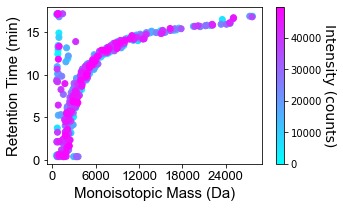

In [87]:
# df = pd.read_excel('/Users/bryan/Downloads/HomologyData.xlsx')
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724.xlsx')
df = thermo_df(df)
df_sample = df.sample(500)

fig = plt.figure(figsize=(5, 3))
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(range(0, 30000, 6000), fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

mp = [i*100 for i in range(df_sample.shape[0])]
p4 = plt.scatter(df_sample.Mass, df_sample.RT, c=mp, cmap=cm.cool)
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 14
# cbar.ax.set_yticklabels([])
# cbar.ax.set_yticklabels(cbar.ax.get_yticks(), rotate=90)
cbar.ax.set_ylabel('Intensity (counts)', size=14, rotation=270)
# plt.show()
output(plt, fig, 'MFE')

mass_x (3,) mass_y (3,)


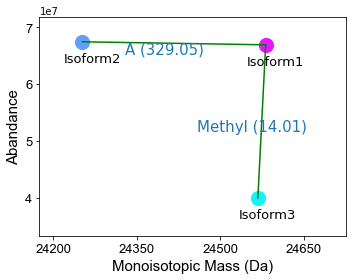

In [133]:
# Fig 1 Homology
# df = pd.read_excel('/Users/bryan/Downloads/HomologyData.xlsx')
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/HomologyData.xlsx')
# plotly_zone(df, y='Vol')
df_ad = df[df.isAD==True]
bcr = base_calling_random(df_ad, homology=True)
# print(bcr)

colors = ['#e917ff', '#619eff', '#15f1ff']
plt, fig = plot_basecalling1(df_ad, bcr[1], y='Vol')
# df_noad = df[df.isAD==False]
for idx, color in enumerate(colors):
    plt.scatter(df_ad.iloc[idx].Mass, df_ad.iloc[idx].Vol, marker='o', s=200, color=color)
plt.scatter(24200, 3.5E7, color='white')
plt.scatter(24700, 7E7, color='white')
# plt.scatter(df_noad.Mass, df_noad.Vol, marker='*', s=200, color='C0')
output(plt, fig, 'homology')

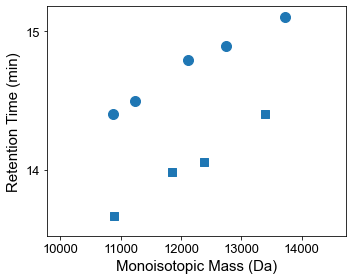

In [140]:
# MassSum

df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/MassSum.xlsx')
# plotly_zone(df, y='Vol')
# bcr = base_calling_random(df)
# print(bcr)
# plt, fig = plot_basecalling(df, bcr[1], y='RT', annotate=False)
fig = plt.figure(figsize=(5, 4))
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(range(13, 16, 1), fontname="Arial", size=13, color='black')

df_a = df[df.is5p==True]
df_b = df[df.is5p==False]
df_a = df_a.iloc[[0, 1, 4, 6, 9]]
df_b = df_b.iloc[[1, 4, 6, 9]]
plt.scatter(df_a.Mass, df_a.RT, marker='o', s=100, color='C0')
plt.scatter(df_b.Mass, df_b.RT, marker='s', s=70, color='C0')
plt.scatter(10000, 13.6, color='white')
plt.scatter(14500, 13.6, color='white')
output(plt, fig, 'MassSum', transparent=False)

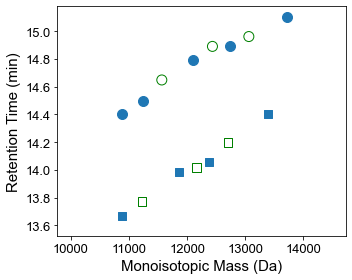

In [147]:
# GapFill
# df = pd.read_excel('/Users/bryan/Downloads/MassSum.xlsx')
# # plotly_zone(df, y='Vol')
# bcr = base_calling_random(df)
# # print(bcr)
# plt, fig = plot_basecalling(df, bcr[1], y='RT', annotate=False)

fig = plt.figure(figsize=(5, 4))
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

df_c = df[df.is5p==True]
df_d = df[df.is5p==False]
df_c1 = df_c.iloc[[0, 1, 4, 6, 9]] #[0, 1, 4, 5, 6, 7, 9]
df_d1 = df_d.iloc[[1, 4, 6, 9]] #[1, 4, 5, 6, 9]
plt.scatter(df_c1.Mass, df_c1.RT, marker='o', s=100, color='C0')
plt.scatter(df_d1.Mass, df_d1.RT, marker='s', s=70, color='C0')
df_c2 = df_c.iloc[[2, 5, 7]] #[0, 1, 4, 5, 6, 7, 9]
df_d2 = df_d.iloc[[2, 5, 7]] #[1, 4, 5, 6, 9]
plt.scatter(df_c2.Mass, df_c2.RT, marker='o', s=100, color='g', facecolors='none')
plt.scatter(df_d2.Mass, df_d2.RT, marker='s', s=70, color='g', facecolors='none')
plt.scatter(10000, 13.6, color='white')
plt.scatter(14500, 13.6, color='white')
output(plt, fig, 'GapFill', transparent=False)

<Figure size 288x144 with 0 Axes>

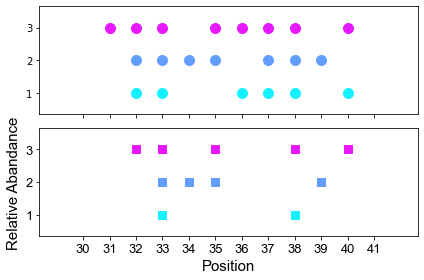

In [179]:
# Relative Abandance version 2*1
fig = plt.figure(figsize=(4, 2))
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
plt.xlabel('Position', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Relative Abandance', fontname="Arial", fontsize=15, color='black')
plt.xticks(range(30, 42, 1), fontname="Arial", size=13, color='black')
plt.yticks(range(6), fontname="Arial", size=13, color='black')

colors = ['#e917ff', '#619eff', '#15f1ff']
c11 = np.array([0, 1, 2, 4, 5, 6, 7, 9]) + 31
c12 = np.array([1, 2, 4, 7, 9]) + 31
ax1.scatter(c11, [3]*len(c11), marker='o', s=100, color=colors[0], label='Isoform1') #'C0'
ax2.scatter(c12, [3]*len(c12), marker='s', s=70, color=colors[0], label='Isoform1') #'C0'
c21 = np.array([1, 2, 3, 4, 6, 7, 8]) + 31
c22 = np.array([2, 3, 4, 8]) + 31
ax1.scatter(c21, [2]*len(c21), marker='o', s=100, color=colors[1], label='Isoform2') #'g'
ax2.scatter(c22, [2]*len(c22), marker='s', s=70, color=colors[1], label='Isoform2') #'g'
c31 = np.array([1, 2, 5, 6, 7, 9]) + 31
c32 = np.array([2, 7]) + 31
ax1.scatter(c31, [1]*len(c31), marker='o', s=100, color=colors[2], label='Isoform3') #'y'
ax2.scatter(c32, [1]*len(c32), marker='s', s=70, color=colors[2], label='Isoform3') #'y'

ax1.scatter(29, 0.5, color='white')
ax1.scatter(42, 3.5, color='white')
ax2.scatter(29, 0.5, color='white')
ax2.scatter(42, 3.5, color='white')
# ax1.legend()
# ax2.legend()
output(plt, fig, 'RelativeAbandance', transparent=True)

<Figure size 288x288 with 0 Axes>

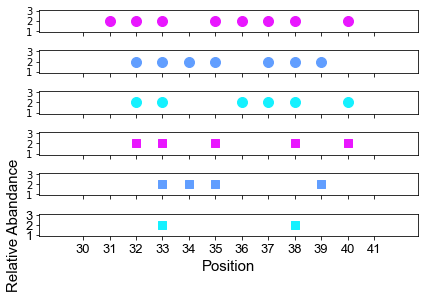

In [178]:
# Relative Abandance Version 6*1
fig = plt.figure(figsize=(4, 4))
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, sharex=True, sharey=True)
plt.xlabel('Position', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Relative Abandance', fontname="Arial", fontsize=15, color='black')
plt.xticks(range(30, 42, 1), fontname="Arial", size=13, color='black')
plt.yticks([1, 2, 3], fontname="Arial", size=13, color='black')

colors = ['#e917ff', '#619eff', '#15f1ff']
c11 = np.array([0, 1, 2, 4, 5, 6, 7, 9]) + 31
c12 = np.array([1, 2, 4, 7, 9]) + 31
ax1.scatter(c11, [2]*len(c11), marker='o', s=100, color=colors[0], label='Isoform1') #'C0'
ax4.scatter(c12, [2]*len(c12), marker='s', s=70, color=colors[0], label='Isoform1') #'C0'
c21 = np.array([1, 2, 3, 4, 6, 7, 8]) + 31
c22 = np.array([2, 3, 4, 8]) + 31
ax2.scatter(c21, [2]*len(c21), marker='o', s=100, color=colors[1], label='Isoform2') #'g'
ax5.scatter(c22, [2]*len(c22), marker='s', s=70, color=colors[1], label='Isoform2') #'g'
c31 = np.array([1, 2, 5, 6, 7, 9]) + 31
c32 = np.array([2, 7]) + 31
ax3.scatter(c31, [2]*len(c31), marker='o', s=100, color=colors[2], label='Isoform3') #'y'
ax6.scatter(c32, [2]*len(c32), marker='s', s=70, color=colors[2], label='Isoform3') #'y'

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.scatter(29, 1, color='white')
    ax.scatter(42, 3, color='white')
#     ax.legend()
#     ax2.scatter(29, 1, color='white')
#     ax2.scatter(42, 1, color='white')
# plt.legend()
# ax2.legend()
output(plt, fig, 'RelativeAbandance', transparent=True)

<Figure size 216x144 with 0 Axes>

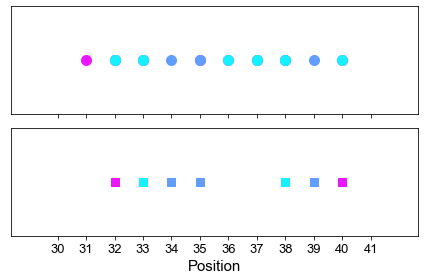

In [158]:
# ComplementaryLadder
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/MassSum.xlsx')
fig = plt.figure(figsize=(3, 2))
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
plt.xlabel('Position', fontname="Arial", fontsize=15, color='black')
# plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')
plt.xticks(range(30, 42, 1), fontname="Arial", size=13, color='black')
plt.yticks(range(4), fontname="Arial", size=13, color='black')

plt.ylabel('')
ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)

colors = ['#e917ff', '#619eff', '#15f1ff']
c1 = np.array([0, 1, 2, 4, 5, 6, 7, 9]) + 31
c2 = np.array([1, 2, 3, 4, 6, 7, 8]) + 31
c3 = np.array([1, 2, 5, 6, 7, 9]) + 31
ax1.scatter(c1, [3]*len(c1), marker='o', s=100, color=colors[0]) #'y'
ax1.scatter(c2, [3]*len(c2), marker='o', s=100, color=colors[1]) #'C0'
ax1.scatter(c3, [3]*len(c3), marker='o', s=100, color=colors[2]) #'g'

c1 = np.array([1, 2, 4, 7, 9]) + 31
c2 = np.array([2, 3, 4, 8]) + 31
c3 = np.array([2, 7]) + 31
ax2.scatter(c1, [3]*len(c1), marker='s', s=70, color=colors[0])
ax2.scatter(c2, [3]*len(c2), marker='s', s=70, color=colors[1])
ax2.scatter(c3, [3]*len(c3), marker='s', s=70, color=colors[2])

ax1.scatter(29, 3, color='white')
ax1.scatter(42, 3, color='white')
ax2.scatter(29, 3, color='white')
ax2.scatter(42, 3, color='white')

output(plt, fig, 'ComplementaryLadder', transparent=True)

In [14]:
def output(plt, fig, svg_name, transparent=True):
    fig.tight_layout()
    plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/Draw/{svg_name}.svg', dpi=300, transparent=transparent)

In [107]:
def plot_basecalling(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None, y='RT'):
#     if in_plt:
#         plt = in_plt
#     else:
    if not plt:
        plt = matplotlib.pyplot
    fig = plt.figure(figsize=(5, 4))
#     fig.patch.set_facecolor('white')
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    
    for idx, row in df.iterrows():
        x_pos = row.Mass
        y_pos = row[y]
        mass = '{:.2f}'.format(x_pos)
#         plt.scatter(x_pos, y_pos)
        if annotate:
            plt.annotate(s=mass, size=13, xy=(x_pos, y_pos), 
                         textcoords="offset points", xytext=(10, -20), ha='center')

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
#         plt.plot(df_pair.Mass, df_pair[y], 'green')
        
        idmax = df_pair.Mass.idxmax()
        x_pos = df_pair.Mass.mean()
        y_pos = df_pair[y].mean()
#         plt.annotate(s=t[2], size=15, xy=(x_pos, y_pos), 
#                      textcoords="offset points", xytext=(-10, 10), ha='center', color='C0')
        
        if not annotate:
            continue
            
#         mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
#         plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')
#         print(mass_pairs, df_pair)
        mass = '{:.2f}'.format(df_pair.iloc[0].Mass)
        plt.annotate(s=mass, size=13, xy=(df_pair.iloc[0].Mass, df_pair.iloc[0][y]), 
                     textcoords="offset points", xytext=(10, -20), ha='center')
        mass = '{:.2f}'.format(df_pair.iloc[1].Mass)
        plt.annotate(s=mass, size=13, xy=(df_pair.iloc[1].Mass, df_pair.iloc[1][y]), 
                     textcoords="offset points", xytext=(10, -20), ha='center')

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    return plt, fig

In [182]:
def plot_basecalling3(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None, y='RT'):
#     if in_plt:
#         plt = in_plt
#     else:
    if not plt:
        plt = matplotlib.pyplot
    fig = plt.figure(figsize=(5, 2))
#     fig.patch.set_facecolor('white')
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
    plt.xlabel('Position', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Relative Abandance', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
    plt.xticks(range(30, 42, 1), fontname="Arial", size=13, color='black')
    plt.yticks([0, 1, 2, 3, 4, 5], fontname="Arial", size=13, color='black')
    return plt, fig
    for idx, row in df.iterrows():
        x_pos = row.Mass
        y_pos = row[y]
        mass = '{:.2f}'.format(x_pos)
#         plt.scatter(x_pos, y_pos)
        if annotate:
            plt.annotate(s=mass, size=13, xy=(x_pos, y_pos), 
                         textcoords="offset points", xytext=(10, -20), ha='center')

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
#         plt.plot(df_pair.Mass, df_pair[y], 'green')
        
        idmax = df_pair.Mass.idxmax()
        x_pos = df_pair.Mass.mean()
        y_pos = df_pair[y].mean()
#         plt.annotate(s=t[2], size=15, xy=(x_pos, y_pos), 
#                      textcoords="offset points", xytext=(-10, 10), ha='center', color='C0')
        
        if not annotate:
            continue
            
#         mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
#         plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')
#         print(mass_pairs, df_pair)
        mass = '{:.2f}'.format(df_pair.iloc[0].Mass)
        plt.annotate(s=mass, size=13, xy=(df_pair.iloc[0].Mass, df_pair.iloc[0][y]), 
                     textcoords="offset points", xytext=(10, -20), ha='center')
        mass = '{:.2f}'.format(df_pair.iloc[1].Mass)
        plt.annotate(s=mass, size=13, xy=(df_pair.iloc[1].Mass, df_pair.iloc[1][y]), 
                     textcoords="offset points", xytext=(10, -20), ha='center')

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    return plt, fig

In [131]:
def plot_basecalling1(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None, y='RT'):
#     if in_plt:
#         plt = in_plt
#     else:
    if not plt:
        plt = matplotlib.pyplot
    fig = plt.figure(figsize=(5, 4))
#     fig.patch.set_facecolor('white')
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Abandance', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
    plt.xticks(range(24200, 25000, 150), fontname="Arial", size=13, color='black')
    plt.yticks(range(30000000, 80000000, 10000000), fontname="Arial", size=13, color='black')
    
    for idx, row in df.iterrows():
        x_pos = row.Mass
        y_pos = row[y]
        mass = '{:.2f}'.format(x_pos)
#         plt.scatter(x_pos, y_pos)
        if annotate and not row.isAD:
            plt.annotate(text=mass, size=13, xy=(x_pos, y_pos), 
                         textcoords="offset points", xytext=(10, -20), ha='center')
        elif annotate and row.isAD:
            plt.annotate(text=row.label, size=13, xy=(x_pos, y_pos), 
                         textcoords="offset points", xytext=(10, -20), ha='center')

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        plt.plot(df_pair.Mass, df_pair[y], 'green')
        
        idmax = df_pair.Mass.idxmax()
        x_pos = df_pair.Mass.mean()
        y_pos = df_pair[y].mean()
        plt.annotate(text=t[2], size=15, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(-10, -10), ha='center', color='C0')
        
        if not annotate:
            continue
            
#         mass = '{:.2f}'.format(df_pair.iloc[0].Mass)
#         plt.annotate(s=mass, size=13, xy=(df_pair.iloc[0].Mass, df_pair.iloc[0][y]), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')
#         mass = '{:.2f}'.format(df_pair.iloc[1].Mass)
#         plt.annotate(s=mass, size=13, xy=(df_pair.iloc[1].Mass, df_pair.iloc[1][y]), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    return plt, fig